# 图数据基本属性

x found in data
edge_index found in data
tensor([[-1.,  1.],
        [ 0.,  1.],
        [ 1.,  1.]])


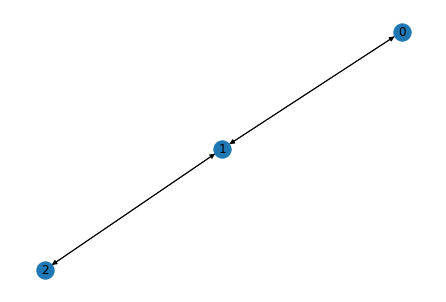

In [1]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import convert
from networkx import draw_kamada_kawai
import matplotlib.pyplot as plt

## 定义节点和边
# 定义节点 需要传入一个 list of list，子 list 表示节点上的特征
x = torch.tensor([[-1,1], [0,1], [1,1]], dtype=torch.float)
# 定义边 需要传入一个 list of list，第一个list是边起点的集合，第二个list是边终点的集合
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)


data = Data(x=x, edge_index=edge_index)
device = torch.device('cpu')
data = data.to(device)

for key, item in data:
    print(f'{key} found in data')

print(data['x'])

dg = convert.to_networkx(data)
draw_kamada_kawai(dg,with_labels=True)
plt.show()




# 图数据集

600


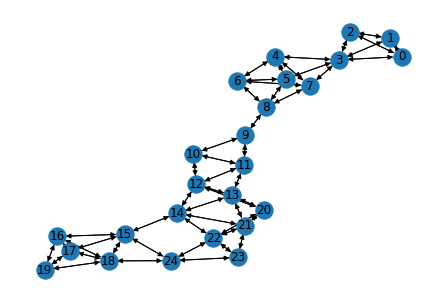

Data(edge_index=[2, 102], x=[25, 3], y=[1])


In [2]:
from torch_geometric.datasets import TUDataset
from random import randint

# ENZYMES 这个数据集有 600 张图
dataset = TUDataset(root='../data/ENZYMES', name='ENZYMES')
print(len(dataset))

# dataset 本质上是一个 list，每个位置存储一张 图
index = randint(0,600)
dg = convert.to_networkx(dataset[index])
draw_kamada_kawai(dg,with_labels=True)
plt.show()
print(dataset[index])

In [4]:
from torch_geometric.datasets import Planetoid

# Cora 这个数据集有 1 张图
dataset = Planetoid(root='../data/Cora', name='Cora')
print(len(dataset))
data = dataset[0]
print(data)


Using existing file ind.cora.x


1
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


Processing...
Done!


# Batch
一个 batch 就是一组图。

In [5]:
from torch_geometric.datasets import TUDataset
from torch_geometric.datasets import Planetoid
from torch_geometric.loader import DataLoader

dataset = TUDataset(root='../data/ENZYMES', name='ENZYMES', use_node_attr=True)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

for data  in loader:
    print(data )




# Cora 这个数据集有 1 张图
dataset = Planetoid(root='../data/Cora', name='Cora')
loader = DataLoader(dataset, batch_size=32, shuffle=True)

for data  in loader:
    print(data )


DataBatch(edge_index=[2, 4264], x=[1148, 21], y=[32], batch=[1148], ptr=[33])
DataBatch(edge_index=[2, 4172], x=[1077, 21], y=[32], batch=[1077], ptr=[33])
DataBatch(edge_index=[2, 4224], x=[1110, 21], y=[32], batch=[1110], ptr=[33])
DataBatch(edge_index=[2, 3758], x=[989, 21], y=[32], batch=[989], ptr=[33])
DataBatch(edge_index=[2, 4134], x=[1033, 21], y=[32], batch=[1033], ptr=[33])
DataBatch(edge_index=[2, 4324], x=[1117, 21], y=[32], batch=[1117], ptr=[33])
DataBatch(edge_index=[2, 3800], x=[1001, 21], y=[32], batch=[1001], ptr=[33])
DataBatch(edge_index=[2, 4052], x=[1043, 21], y=[32], batch=[1043], ptr=[33])
DataBatch(edge_index=[2, 3778], x=[1063, 21], y=[32], batch=[1063], ptr=[33])
DataBatch(edge_index=[2, 3954], x=[1041, 21], y=[32], batch=[1041], ptr=[33])
DataBatch(edge_index=[2, 4458], x=[1214, 21], y=[32], batch=[1214], ptr=[33])
DataBatch(edge_index=[2, 3732], x=[1008, 21], y=[32], batch=[1008], ptr=[33])
DataBatch(edge_index=[2, 4110], x=[1022, 21], y=[32], batch=[1022]

# 绘制数据集

In [6]:
from torch_geometric.utils import convert
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

cora = to_networkx(dataset.data)
pos = nx.layout.spring_layout(cora)


node_color = ["red","blue","green","yellow","peru","violet","cyan"] 
node_label = np.array(list(cora.nodes)) 
node_classes = dataset.data.y.data.numpy()
for i in np.arange(len(np.unique(node_classes))):
    node_list = node_label[node_classes == i]
    nx.draw_networkx_nodes(cora, pos, nodelist=list(node_list),
                           node_size=50,  
                           node_color=node_color[i], 
                           alpha=0.8)
nx.draw_networkx_edges(cora, pos,width=1,edge_color="black")

plt.show()